# Proyek Akhir: Menyelesaikan Permasalahan Human Resources

- Nama: Fery Irawan
- Email: fery21irawan.me@gmail.com
- Id Dicoding: mazafathi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [107]:
!pip install numpy pandas matplotlib seaborn scikit-learn==1.2.2

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math

### Menyiapkan data yang akan digunakan

In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [111]:
df.duplicated().sum()

0

In [112]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat jumlah data yang tidak berimbang pada column Attrition dan column yang lainnya, yang menandakaan bahwa terdapat data yang berisikan nilai isNan

In [113]:
df[df.Attrition.isna()]

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3
1447,1448,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,1,...,3,80,1,24,3,1,20,8,13,9
1448,1449,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,1,...,2,80,0,8,5,4,3,2,1,2
1462,1463,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,1,...,4,80,0,21,2,3,2,0,0,2


## Data Preparation / Preprocessing

### Data Cleaning

dikarenakan jumlah datanya masih banyak dan saya hanya perlu menganalisa penyebab tingginya attrition, maka saya memutuskan untuk menghapus saja data yang memiliki nilai isNan agar tidak mempengaruhi hasilnya nanti

In [114]:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [115]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


### Explorasi Data Analisis

In [116]:
categorical_columns = df.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

df_categorical = df[categorical_columns].apply(label_encoder.fit_transform)

df_all_encoded = pd.concat([df_categorical, df.select_dtypes(exclude='object')], axis=1)

correlation_matrix = df_all_encoded.corr(method='pearson').round(2)

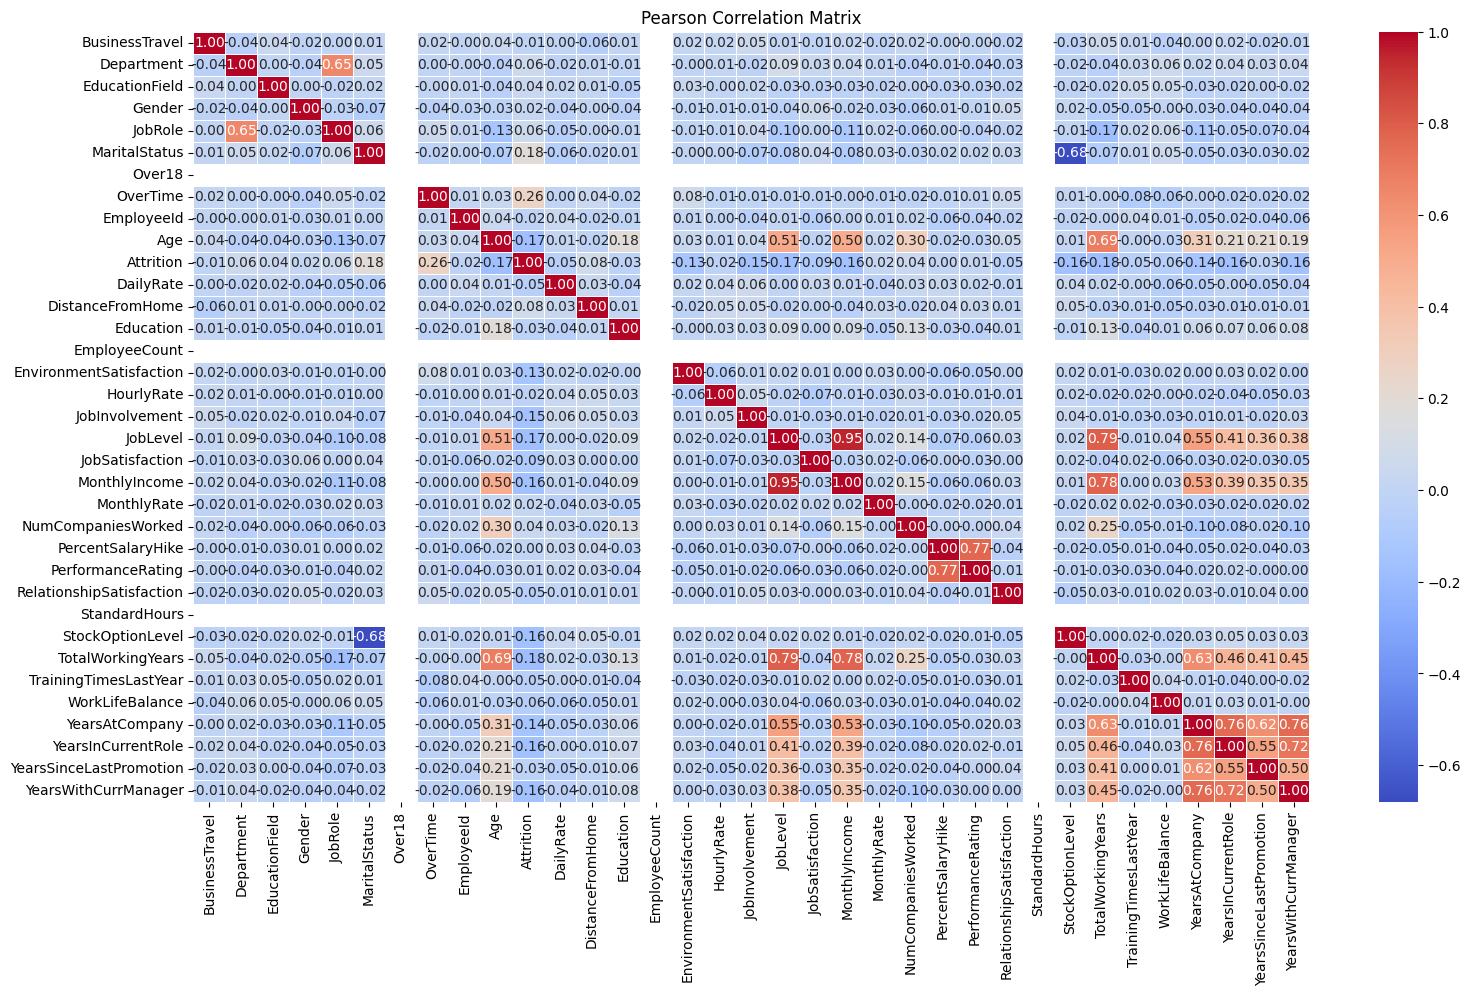

In [117]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

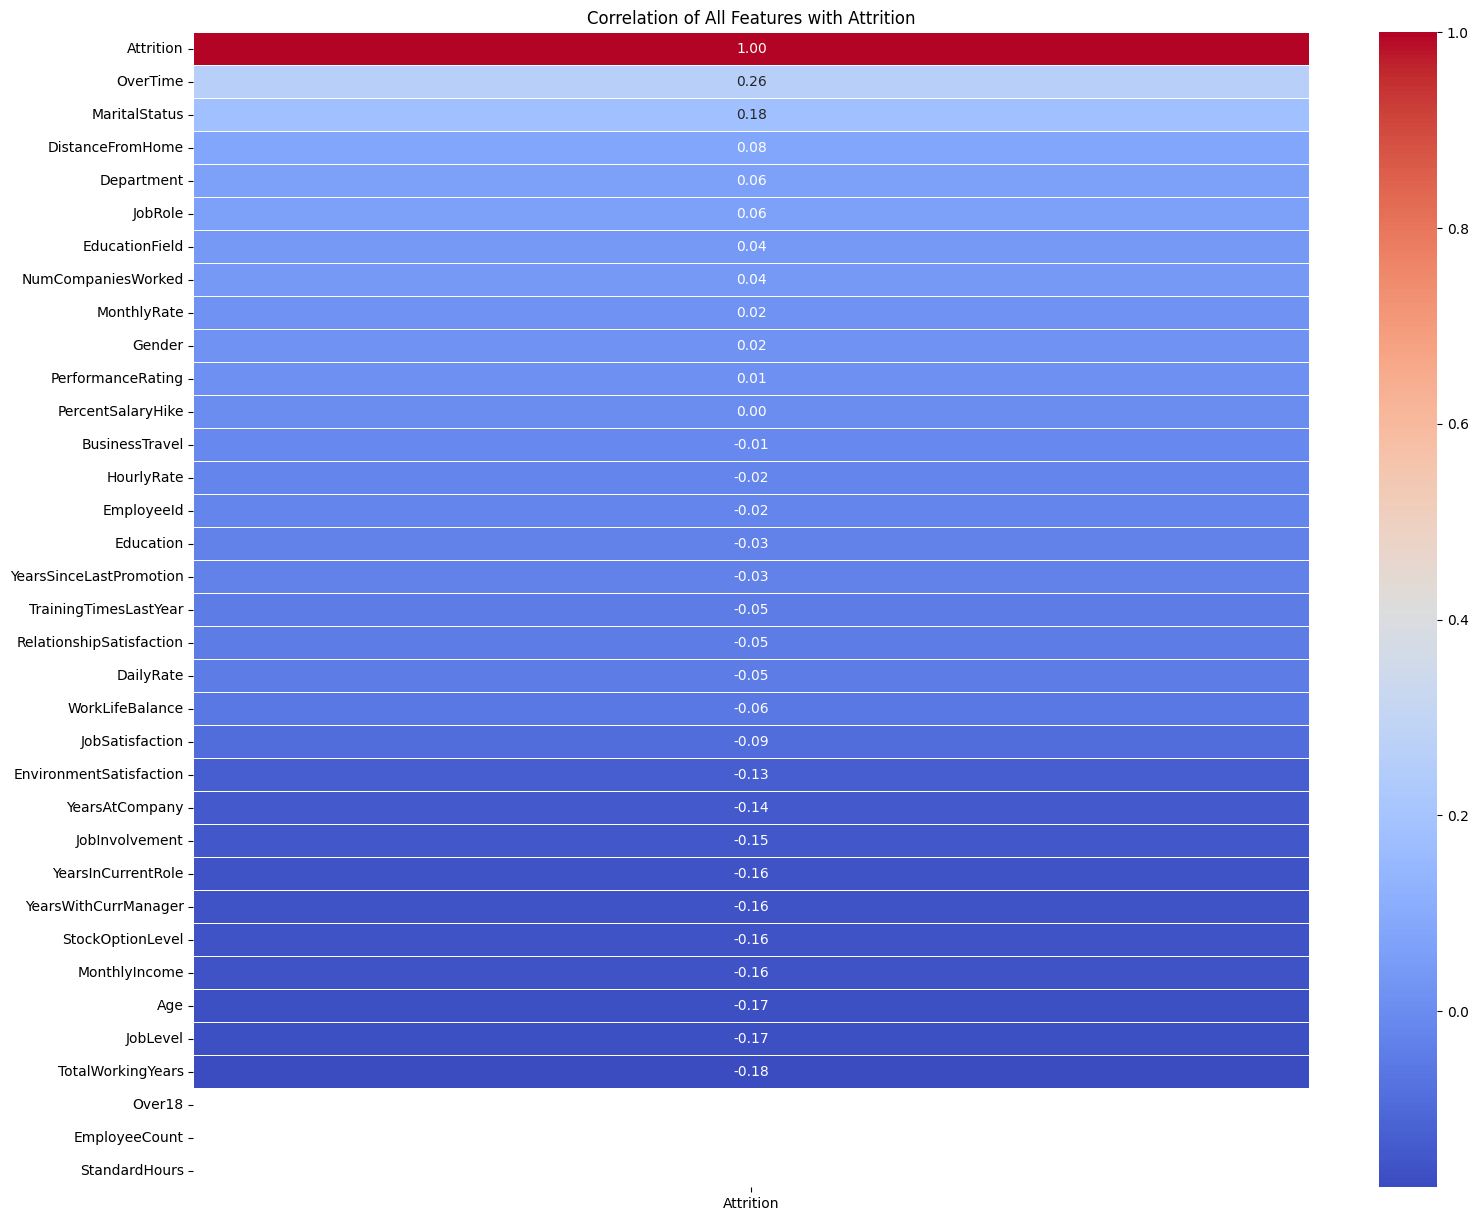

In [118]:
correlation_with_attrition = correlation_matrix['Attrition']

correlation_table = pd.DataFrame(correlation_with_attrition).sort_values(ascending=False, by=['Attrition'])

plt.figure(figsize=(18, 15))

sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation of All Features with Attrition')

plt.show()

In [119]:
def plot_attrition_by_category(category_column):

    category_counts = df.groupby([category_column, 'Attrition']).size()

    category_counts = category_counts.unstack(fill_value=0)
    return category_counts

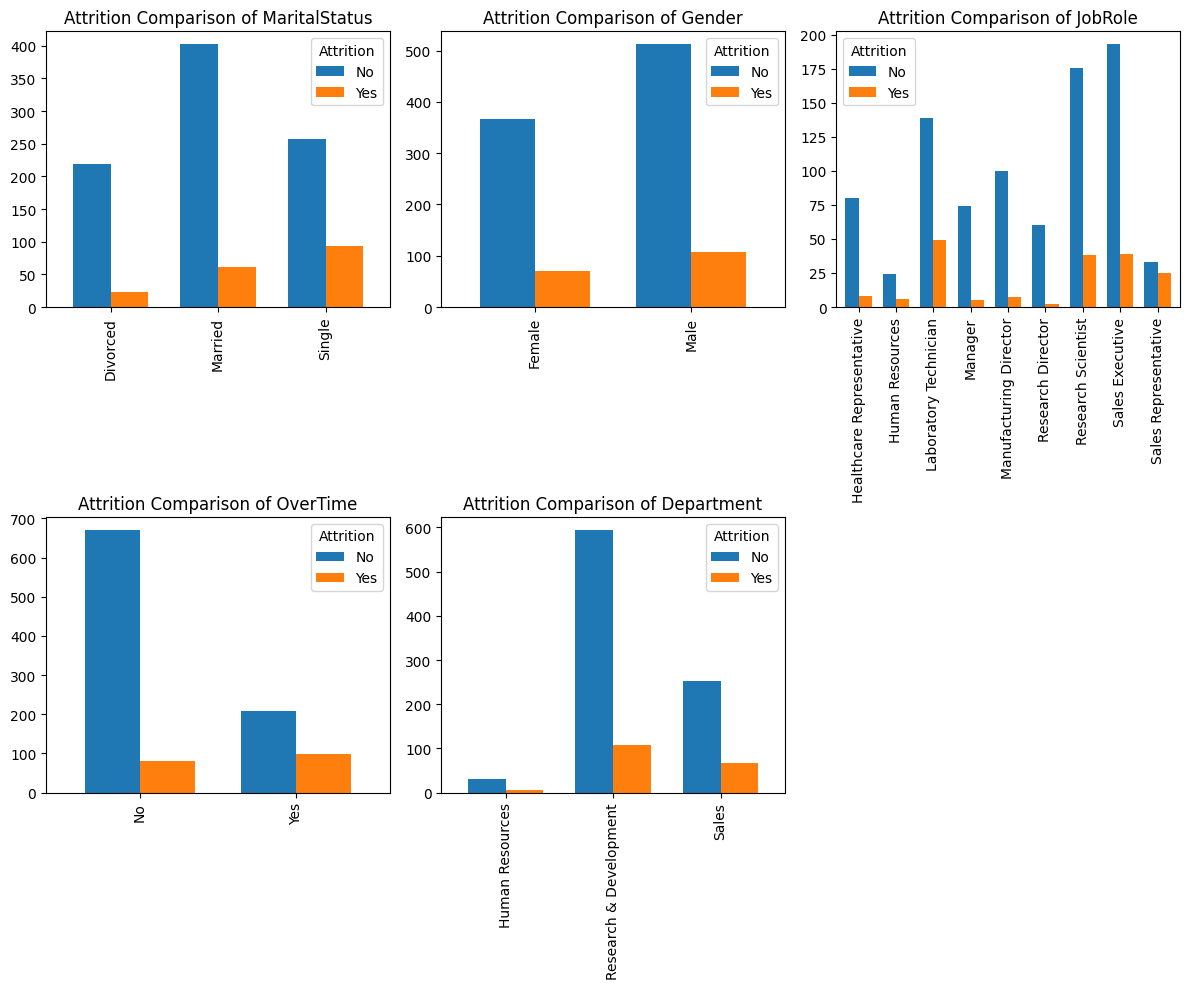

In [120]:
cols = ["MaritalStatus", "Gender", "JobRole", "OverTime", "Department"]

ncols = min(3, len(cols))

nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 5))

axes = axes.flatten()

for i, column in enumerate(cols):
    ax = axes[i]
    data = plot_attrition_by_category(column)
    data.plot(kind='bar', width=0.7, ax=ax, title=f'Attrition Comparison of {column}')
    ax.set_xlabel(None)

    ax.legend(title='Attrition', labels=['No', 'Yes'])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

#### Cek Attrition berdasarkan feature

##### Menyiapkan Variabel dan Fungsi

In [121]:
attrition_data = df[df['Attrition'] == 1]

In [122]:
def attrition_by_feature (column, sort=False):
    if sort is not None:
        return attrition_data.groupby(column).size().sort_values(ascending=sort)
    else:
        return attrition_data.groupby(column).size()

In [123]:
def attrition_by_group_value(attrition_data, bins, labels, column):
    attrition_data.loc[:, f'{column}_Group'] = pd.cut(attrition_data[column], bins=bins, labels=labels, right=False)
    group_counts = attrition_data[f'{column}_Group'].value_counts()
    return group_counts

##### Menampilkan Visualisasi

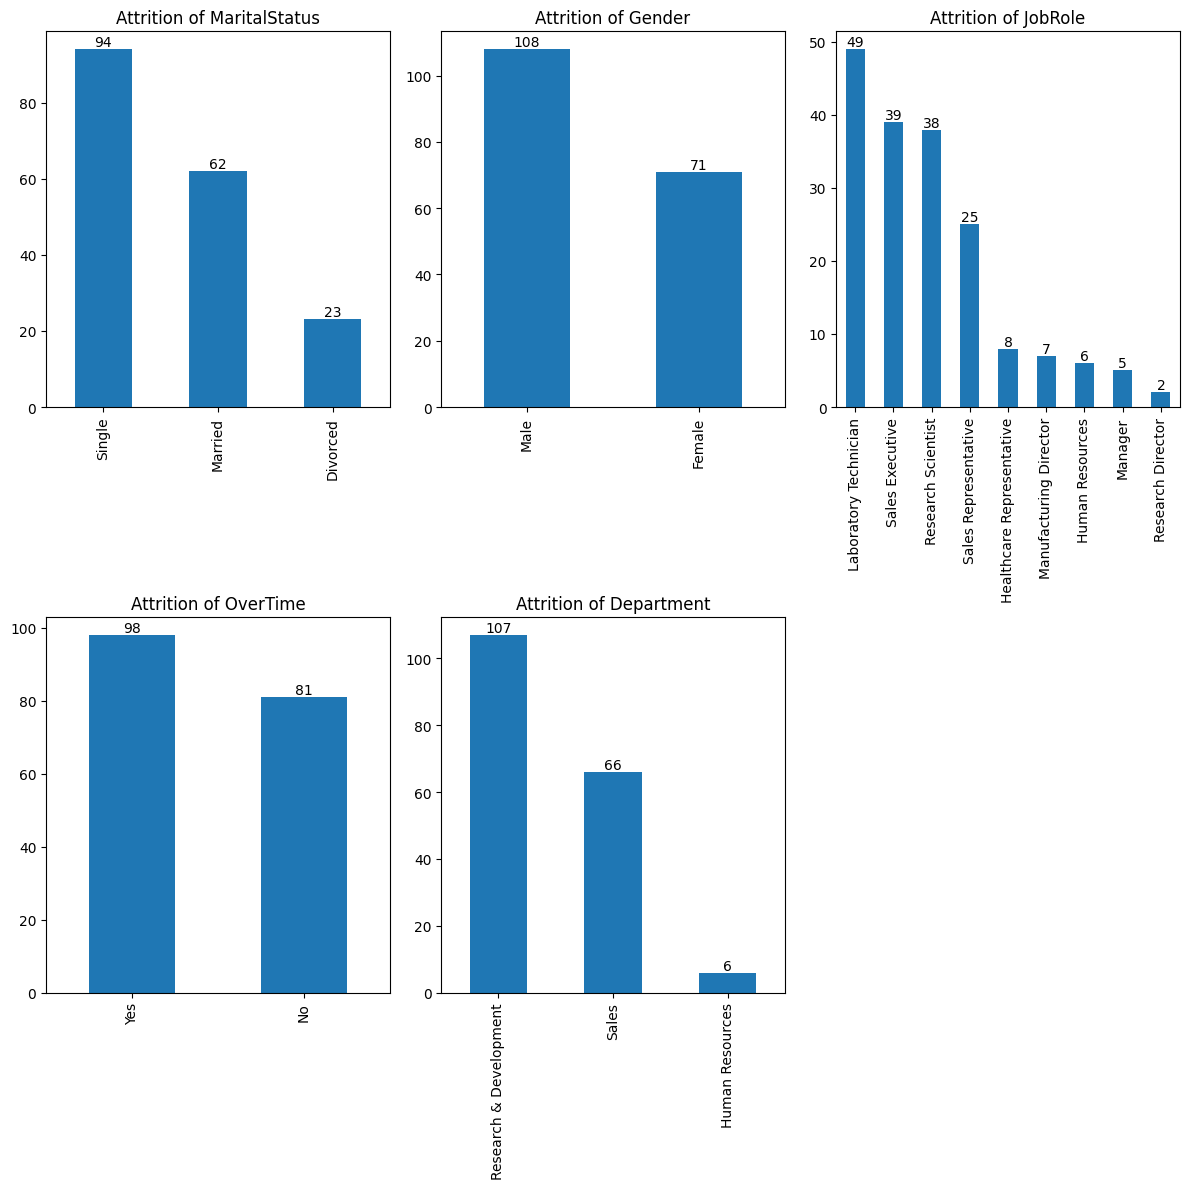

In [124]:
cols = ["MaritalStatus", "Gender", "JobRole", "OverTime", "Department"]

ncols = min(3, len(cols))

nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 6))

axes = axes.flatten()

for i, column in enumerate(cols):
    ax = axes[i]
    data = attrition_by_feature(column)
    data.plot(kind='bar', ax=ax, title=f'Attrition of {column}')
    ax.set_xlabel(None)

    for index, value in enumerate(data):
        ax.text(index, value, str(value), ha='center', va='bottom')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



plt.tight_layout()
plt.show()

#### Cek Attrion berdasarkan Overtime, Department, JobRole serta Cek Attrition berdasarkan kelompok usia

##### Menyiapkan Data Perbandingan Overtime dan JobRole

In [125]:
data_compare = attrition_by_feature(['OverTime', 'JobRole'], None)

job_roles = data_compare['Yes'].sort_values(ascending=False).index.tolist()
no_overtime = [data_compare.loc[('No', job_role)] for job_role in job_roles]
yes_overtime = [data_compare.loc[('Yes', job_role)] for job_role in job_roles]

##### Menyiapkan Data Kelompok Usia

In [126]:
bins = [18, 25, 35, 45, 50, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-50', '50+']
attrition_count_by_age_group = attrition_by_group_value(attrition_data, bins, labels, 'Age')

<ipython-input-123-7cd55a9cf562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_data.loc[:, f'{column}_Group'] = pd.cut(attrition_data[column], bins=bins, labels=labels, right=False)


##### Menampilkan Visualisasi

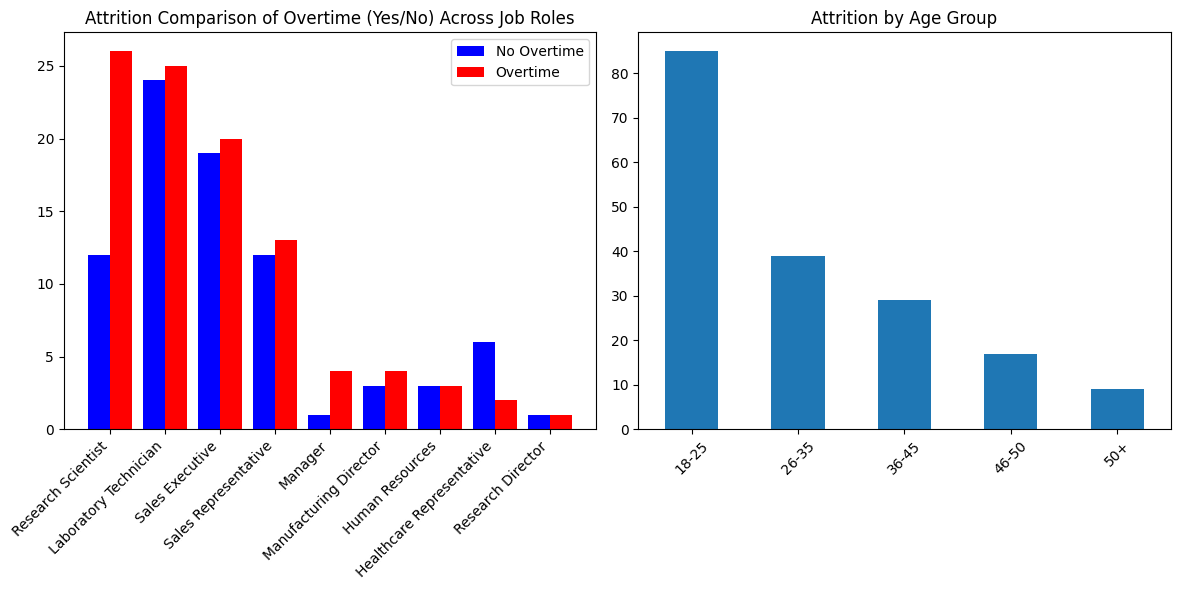

In [127]:
x = range(len(job_roles))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


attrition_count_by_age_group.plot(kind='bar', ax=ax2)

ax2.set_title('Attrition by Age Group')
ax2.set_xlabel(None)
ax2.set_xticklabels(labels, rotation=45)

bar_width = 0.4

ax1.bar(x, no_overtime, width=bar_width, label='No Overtime', color='b')
ax1.bar([i + bar_width for i in x], yes_overtime, width=bar_width, label='Overtime', color='r')

ax1.set_title('Attrition Comparison of Overtime (Yes/No) Across Job Roles')
ax1.set_xlabel(None)
ax1.set_xticks([i + bar_width/2 for i in x])
ax1.set_xticklabels(job_roles, rotation=45, ha='right')
ax1.legend()

plt.tight_layout()
plt.show()

### Export

#### Dataset

In [128]:
df.to_csv('employees.csv', index=False)

#### requirements.txt

In [130]:
!pip freeze > requirements.txt

## Modeling

## Evaluation